In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

### 2.3.2 k-최근접 이웃
- 가장 간단한 머신러닝 알고리즘  
- __훈련 데이터셋을 그냥 저장__하는 것이 모델을 만드는 과정의 전부  
- 새로운 데이터 포인트에 예측할 땐 '최근접 이웃'을 탐색

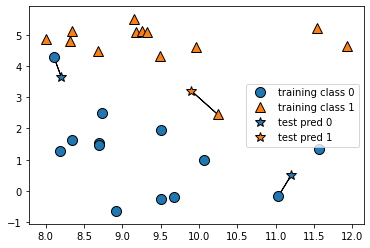

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- 1-최근접 이웃 알고리즘의 예측이 데이터 포인트의 레이블이 됨

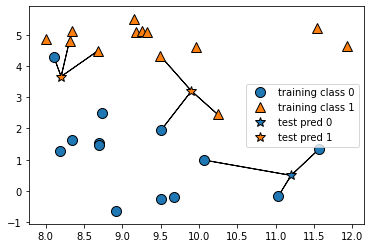

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

- 일반화 성능을 평가하기 위해 데이터를 훈련 세트와 테스트 세트로 분리

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

- KNeighborsClassifier를 임포트하고 객체 생성
- 이웃의 수 같은 매개변수 지정

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- 훈련 세트를 사용하여 분류 모델을 학습
- KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것

In [7]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


- 테스트 데이터에 대해 predict 메서드를 호출하여 예측

In [8]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


- 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출

#### KNeighborsClassifier 분석
- 가능한 모든 테스트 포인트의 예측을 xy평면에 도시
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색칠
- 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 __결정 경계__ 확인

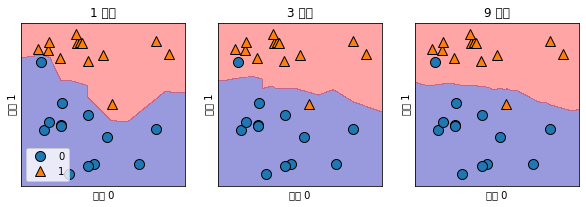

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

- 이웃의 수를 늘릴수록 결정 경계가 더 부드러워짐
- 부드러운 경계는 더 단순한 모델을 의미
- 이웃을 많이 사용할수록 복잡도가 낮아짐
- 훈련 데이터 전체를 이웃의 수로 지정하는 경우 모든 테스트 포인트가 같은 이웃을 가지게 됨  
  -> 테스트 포인트에 대한 예측은 모두 같은 값이 됨  
  -> 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨

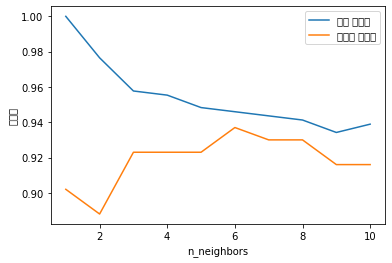

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

- 최근접 이웃의 수가 늘어날수록 모델은 단순해지고 훈련 데이터의 정확도가 줄어듬
- 1-최근접 이웃일 때는 모델이 너무 복잡해서 정확도가 낮음
- 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도가 낮음
- 적절한 이웃의 수를 선택

#### k-최근접 이웃 회귀
- k-최근접 이웃 알고리즘을 회귀 분석에도 사용할 수 있음

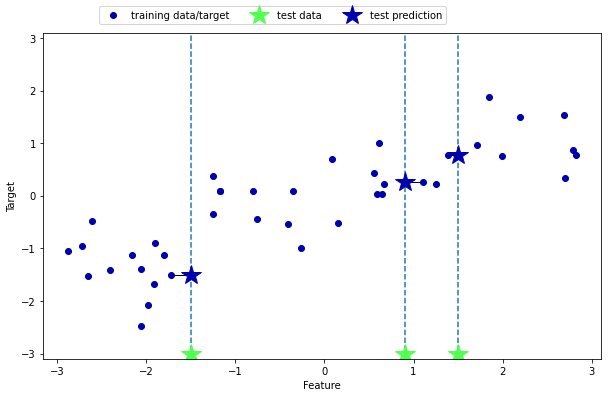

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

- 1-최근접 이웃 알고리즘에서 예측은 가장 가까운 이웃의 타깃 값

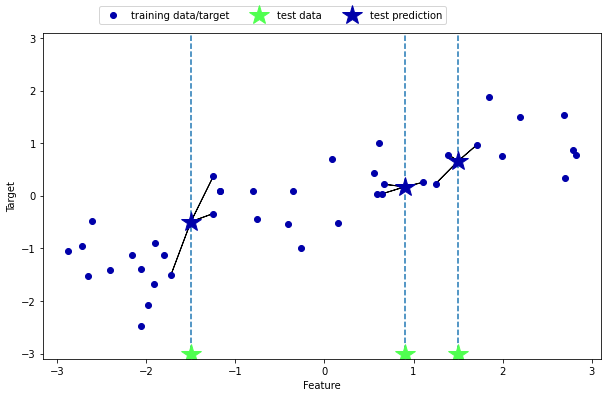

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

- 여러 개의 최근접 이웃을 사용할 때의 예측은 이웃 간의 평균

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

- 회귀를 위한 k-최근접 이웃 알고리즘을 사용하기 위해 KNeighborsRegressor를 import

In [23]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


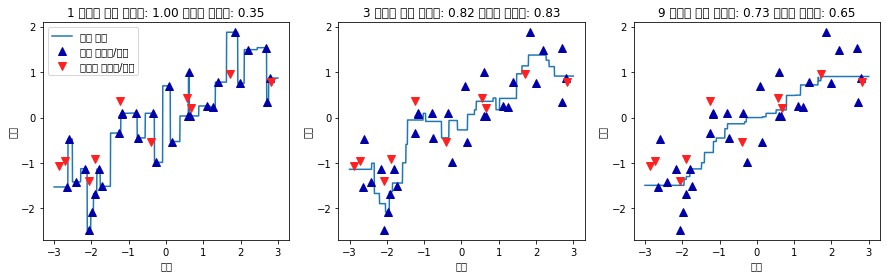

In [25]:
fig, axes=plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

- 이웃을 하나만 사용할 때는 예측값이 훈련 데이터 포인트를 모두 지나감
  - 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 크기 때문에
  
  
- 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게 됨